In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import json

In [3]:
df = pd.read_parquet("DSCB310 - UE2 - Shopping Cartsparquet.sec")

In [4]:
df.to_csv("df.csv")

In [ ]:
## Zusammensetzung aller Bestellungen und Analyse, welche die umsatzstärksten Counties sind

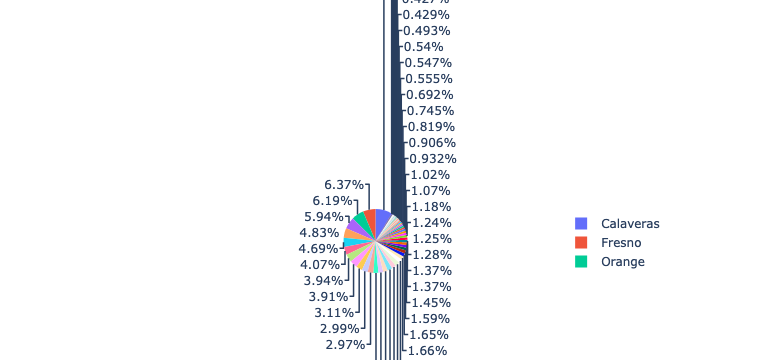

In [19]:
df_revenue = df.groupby("county",as_index=False)["order_id"].count()
df_revenue = df_revenue.rename(columns={"order_id":"count_sold_products"})
df_revenue["sold_products_general"]= 6145748
df_revenue["ratio"]=df_revenue["count_sold_products"] / df["sold_products_general"]
df_revenue.to_csv("df_revenue.csv")
px.pie(df_revenue,values="ratio",names="county",)

In [3]:
df.groupby("department",as_index=False)["order_id"].count()

department  order_id
0           alcohol     27551
1            babies     79488
2            bakery    222343
3         beverages    506057
4         breakfast    134721
5              bulk      6537
6      canned goods    203549
7        dairy eggs   1027947
8              deli    199675
9   dry goods pasta    165053
10           frozen    424780
11        household    139000
12    international     52268
13     meat seafood    135178
14          missing     13968
15            other      6676
16           pantry    354402
17    personal care     84479
18             pets     18804
19          produce   1796590
20           snacks    546682

In [4]:
df.describe()

order_id    product_id  add_to_cart_order     reordered  \
count  6.145748e+06  6.145748e+06       6.145748e+06  6.145748e+06   
mean   3.022741e+05  2.557388e+04       8.443727e+00  5.905792e-01   
std    1.745083e+05  1.408562e+04       7.229406e+00  4.917270e-01   
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%    1.512510e+05  1.353500e+04       3.000000e+00  0.000000e+00   
50%    3.022600e+05  2.526600e+04       6.000000e+00  1.000000e+00   
75%    4.531630e+05  3.786000e+04       1.200000e+01  1.000000e+00   
max    6.049390e+05  4.968800e+04       1.450000e+02  1.000000e+00   

            user_id     order_dow  order_hour_of_day  days_since_prior_order  \
count  6.145748e+06  6.145748e+06       6.145748e+06            5.769050e+06   
mean   1.027695e+05  2.740850e+00       1.343005e+01            1.133499e+01   
std    5.986943e+04  2.095561e+00       4.254708e+00            8.945928e+00   
min    1.100000e+01  0.000000e+00       0.000000e+00            0.000000e+00   
25%    5.038600e+04  1.000000e+00       1.000000e+01            5.000000e+00   
50%    1.027650e+05  3.000000e+00       1.300000e+01            8.000000e+00   
75%    1.544110e+05  5.000000e+00       1.600000e+01            1.500000e+01   
max    2.062030e+05  6.000000e+00       2.300000e+01            3.000000e+01   

           aisle_id  department_id  
count  6.145748e+06   6.145748e+06  
mean   7.129819e+01   9.925439e+00  
std    3.820772e+01   6.282798e+00  
min    1.000000e+00   1.000000e+00  
25%    3.100000e+01   4.000000e+00  
50%    8.300000e+01   9.000000e+00  
75%    1.070000e+02   1.600000e+01  
max    1.340000e+02   2.100000e+01

In [5]:
# Zeitreihe mache ich: order_hour_of_day, order_dow ; county / product / aisle 

# Zeitreihenanalyse

## How many products were purchased on the different weekdays?

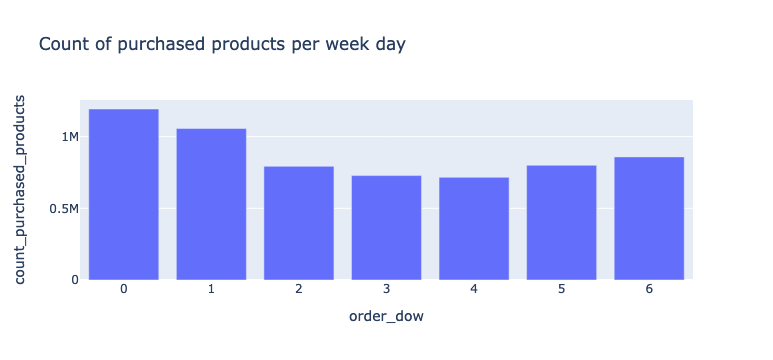

In [6]:
df1=df.groupby("order_dow",as_index=False)["user_id"].count().sort_values(by="user_id",ascending=False)
df1 = df1.rename(columns={"user_id":"count_purchased_products"})

#df1.plot.scatter(x="order_dow",y="count_purchased_products")

fig = px.bar(df1, x='order_dow', y='count_purchased_products',title="Count of purchased products per week day")
fig.show()
# Erkenntnis: Anfangs der Woche werden die meisten Produkte  gekauft, zum Wochenende hin steigt es dann wieder an 

## How many products were purchased on different hours?

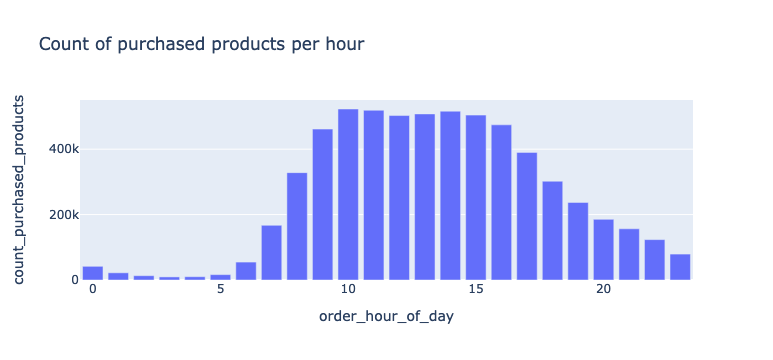

In [7]:
df2 = df.groupby("order_hour_of_day",as_index=False)["user_id"].count().sort_values(by="user_id", ascending=False)
df2 = df2.rename(columns={"user_id":"count_purchased_products"})

#df2.plot.scatter(x="order_hour_of_day",y="count_purchased_products")
fig = px.bar(df2, x='order_hour_of_day', y='count_purchased_products',title="Count of purchased products per hour")
fig.show()
# Die meisten Produkte werden zwischen 10 und 15 Uhr bestellt

## How many items were purchased in one order?

In [8]:
df_grouped_by_order_id = df.groupby(["order_id"],as_index=False)["product_id"].count().sort_values(by="product_id",ascending=False)
df_grouped_by_order_id = df_grouped_by_order_id.rename(columns={"product_id":"items_per_order"})
df_grouped_by_order_id

order_id  items_per_order
276700    276701              145
10832      10833              127
463837    463838              109
378148    378149              108
480547    480548              100
...          ...              ...
338742    338743                1
60999      61000                1
175756    175757                1
548229    548230                1
302469    302470                1

[604939 rows x 2 columns]

## How many orders were placed on weekdays?

In [9]:
df3=df.groupby(["order_id","order_dow"],as_index=False)["product_id"].count().sort_values(by="order_dow")

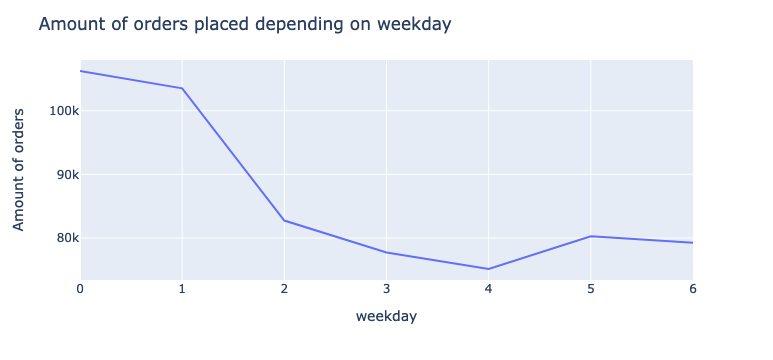

In [10]:
df4 = df3.groupby("order_dow", as_index=False)["order_id"].count()
fig4 = px.line(df4,x="order_dow",y="order_id")
fig4 = fig4.update_layout(title='Amount of orders placed depending on weekday',
                   xaxis_title='weekday',
                   yaxis_title='Amount of orders')

fig4.show()

## How many orders were placed on the hours?

In [11]:
df5=df.groupby(["order_id","order_hour_of_day"],as_index=False)["product_id"].count().sort_values(by="order_hour_of_day")
df5

order_id  order_hour_of_day  product_id
235954    235955                  0           4
224667    224668                  0          20
78807      78808                  0           3
439578    439579                  0          30
144923    144924                  0           9
...          ...                ...         ...
451919    451920                 23           3
496280    496281                 23           3
594396    594397                 23           4
561805    561806                 23          41
129794    129795                 23          25

[604939 rows x 3 columns]

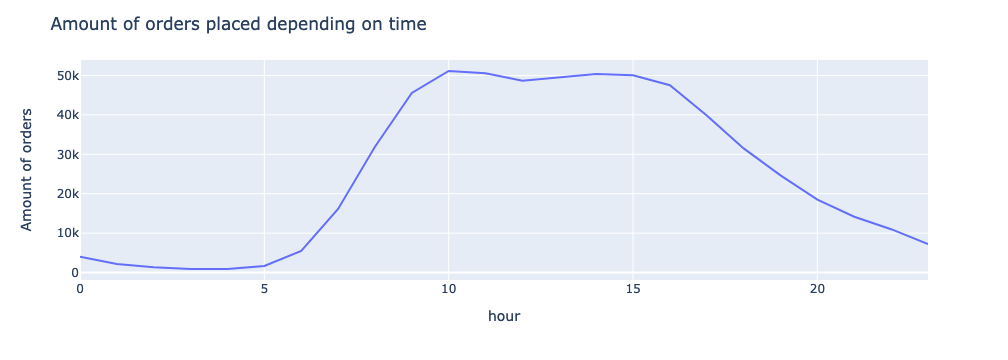

In [12]:
df6 = df5.groupby("order_hour_of_day", as_index=False)["order_id"].count()
fig6 = px.line(df6,x="order_hour_of_day",y="order_id")
fig6 = fig6.update_layout(title='Amount of orders placed depending on time',
                   xaxis_title='hour',
                   yaxis_title='Amount of orders')

fig6.show()

## Orders placed on hour and certain weekday combinations

In [13]:
df7 = df.groupby(["order_id","order_dow","order_hour_of_day"],as_index=False)["product_id"].count()


In [14]:
df8 = df7.groupby(["order_dow","order_hour_of_day"],as_index=False)["order_id"].count()
df8

order_dow  order_hour_of_day  order_id
0            0                  0       716
1            0                  1       437
2            0                  2       263
3            0                  3       163
4            0                  4       123
..         ...                ...       ...
163          6                 19      3280
164          6                 20      2392
165          6                 21      1909
166          6                 22      1464
167          6                 23      1119

[168 rows x 3 columns]

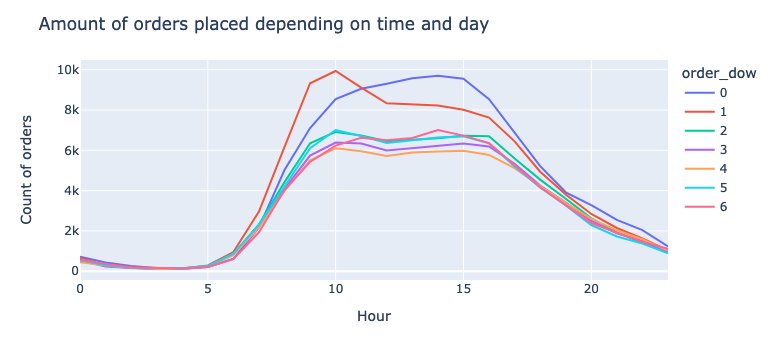

In [15]:
fig8 = px.line(df8,x="order_hour_of_day",y="order_id",color="order_dow")
fig8 = fig8.update_layout(title='Amount of orders placed depending on time and day', xaxis_title='Hour', yaxis_title='Count of orders')
fig8.show()

## "High time" ist montags 10 Uhr 

## Bestellungen pro User-ID

In [16]:
df9 = df.groupby(["order_id","user_id"],as_index=False)["reordered"].count()
df9

order_id  user_id  reordered
0              1   205970          8
1              2   178520         13
2              3   156122         26
3              4   135442         15
4              5    45082         13
...          ...      ...        ...
604934    604935   139822          3
604935    604936   103510          2
604936    604937   167185          4
604937    604938   107102          4
604938    604939    52726          9

[604939 rows x 3 columns]

In [17]:
df10=df9.groupby(["user_id"],as_index=False)["order_id"].count().sort_values(by="order_id",ascending=False)
# Maximal 100 Bestellungen pro User-ID gibt es

## Wie viele User haben wie oft bestellt?

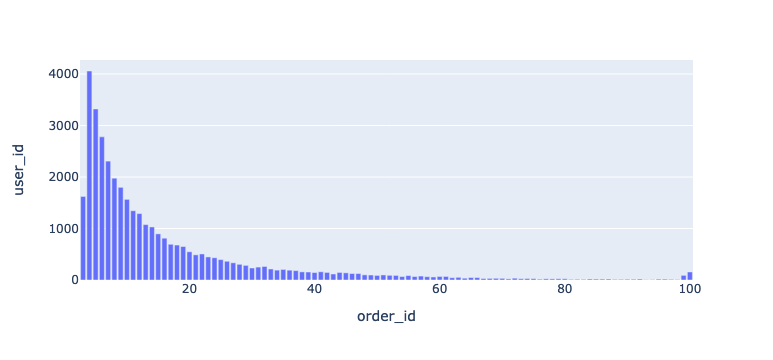

In [18]:
df11=df10.groupby("order_id",as_index=False).count()
fig11=px.bar(df11,x="order_id",y="user_id")
fig11.show()

## High times pro County

In [19]:
df12=df.groupby(["order_dow","order_hour_of_day","county","order_id"],as_index=False)["product_id"].count()
df12

order_dow  order_hour_of_day   county  order_id  product_id
0               0                  0  Alameda      7165           6
1               0                  0  Alameda     39544           8
2               0                  0  Alameda    326688           2
3               0                  0  Alameda    356832           3
4               0                  0  Alameda    389134           2
...           ...                ...      ...       ...         ...
604934          6                 23     Yuba    523411          10
604935          6                 23     Yuba    549655           7
604936          6                 23     Yuba    563403           8
604937          6                 23     Yuba    564392           4
604938          6                 23     Yuba    602534          10

[604939 rows x 5 columns]

In [20]:
df13 = df12.groupby(["county","order_dow","order_hour_of_day"],as_index=False)["order_id"].count().sort_values(by="order_id",ascending=False)

In [21]:
df13

county  order_dow  order_hour_of_day  order_id
499        Calaveras          0                 12       805
501        Calaveras          0                 14       803
500        Calaveras          0                 13       790
502        Calaveras          0                 15       773
498        Calaveras          0                 11       748
...              ...        ...                ...       ...
5385  San Bernardino          5                 13         1
5273      San Benito          4                  3         1
6008       San Mateo          0                  5         1
5386  San Bernardino          5                 15         1
865     Contra Costa          2                  0         1

[8751 rows x 4 columns]

In [22]:
df13_max = df13.groupby("county",as_index=False).max().sort_values(by="order_id",ascending=False)
df13_max = df13_max.drop(columns=["order_dow","order_hour_of_day"],axis=1)
df13_max

county  order_id
4         Calaveras       805
9            Fresno       653
14             Kern       646
10            Glenn       584
29           Orange       563
57             Yuba       450
50           Sutter       448
26         Monterey       426
55          Ventura       413
21         Mariposa       391
2            Amador       377
43       Santa Cruz       358
16             Lake       321
33       Sacramento       310
41    Santa Barbara       276
12         Imperial       271
37    San Francisco       270
19           Madera       269
18      Los Angeles       222
23           Merced       197
22        Mendocino       187
20            Marin       167
24            Modoc       165
40        San Mateo       153
46         Siskiyou       147
1            Alpine       145
42      Santa Clara       141
13             Inyo       138
56             Yolo       133
5            Colusa       130
6      Contra Costa       123
28           Nevada       120
31           Plumas       118
34       San Benito        99
0           Alameda        84
32        Riverside        81
44           Shasta        81
45           Sierra        70
39  San Luis Obispo        68
27             Napa        68
25             Mono        57
47           Solano        56
49       Stanislaus        55
15            Kings        54
36        San Diego        48
17           Lassen        46
48           Sonoma        46
8         El Dorado        46
11         Humboldt        43
54         Tuolumne        39
53           Tulare        38
7         Del Norte        29
51           Tehama        28
38      San Joaquin        19
35   San Bernardino         8
52          Trinity         6
30           Placer         3
3             Butte         1

In [23]:
df14=pd.merge(df13_max,df13, how="left", on=["county","order_id"],validate="one_to_many")

In [24]:
df14

county  order_id  order_dow  order_hour_of_day
0   Calaveras       805          0                 12
1      Fresno       653          1                 10
2        Kern       646          1                 10
3       Glenn       584          0                 14
4      Orange       563          0                 13
..        ...       ...        ...                ...
58    Trinity         6          6                 15
59     Placer         3          1                 10
60      Butte         1          5                  8
61      Butte         1          6                 16
62      Butte         1          2                 13

[63 rows x 4 columns]

Sunburst-Grafik

In [ ]:
px.sunburst(df14, path=['order_dow', 'order_hour_of_day', 'county'], values='order_id', title= 'Sunburst')

In [ ]:
df14_duplicates = df14[df14["county"].duplicated()]

In [26]:
df14=df14.drop([26,55,58,61,62])
df14
# Neue Spalte: 24*dow+order_hour --> Das als time series 

county  order_id  order_dow  order_hour_of_day
0         Calaveras       805          0                 12
1            Fresno       653          1                 10
2              Kern       646          1                 10
3             Glenn       584          0                 14
4            Orange       563          0                 13
5              Yuba       450          1                  9
6            Sutter       448          0                 15
7          Monterey       426          0                 15
8           Ventura       413          0                 14
9          Mariposa       391          0                 14
10           Amador       377          1                 10
11       Santa Cruz       358          0                 14
12             Lake       321          1                 10
13       Sacramento       310          1                  9
14    Santa Barbara       276          0                 15
15         Imperial       271          1                 10
16    San Francisco       270          0                 13
17           Madera       269          1                  9
18      Los Angeles       222          0                 12
19           Merced       197          0                 15
20        Mendocino       187          1                  9
21            Marin       167          0                 15
22            Modoc       165          1                  9
23        San Mateo       153          1                 10
24         Siskiyou       147          0                 15
25           Alpine       145          0                 13
27      Santa Clara       141          1                 10
28             Inyo       138          0                 13
29             Yolo       133          0                 15
30           Colusa       130          1                  9
31     Contra Costa       123          0                 14
32           Nevada       120          0                 15
33           Plumas       118          0                 13
34       San Benito        99          0                 10
35          Alameda        84          1                  9
36        Riverside        81          0                 10
37           Shasta        81          1                 12
38           Sierra        70          1                 10
39  San Luis Obispo        68          0                 12
40             Napa        68          1                 11
41             Mono        57          1                 10
42           Solano        56          1                 15
43       Stanislaus        55          0                 13
44            Kings        54          5                 10
45        San Diego        48          5                 15
46           Lassen        46          0                 12
47           Sonoma        46          1                 10
48        El Dorado        46          1                 10
49         Humboldt        43          1                 10
50         Tuolumne        39          1                 15
51           Tulare        38          1                 13
52        Del Norte        29          1                  9
53           Tehama        28          6                 11
54      San Joaquin        19          0                 13
56   San Bernardino         8          1                 10
57          Trinity         6          0                 15
59           Placer         3          1                 10
60            Butte         1          5                  8

In [27]:
# Visualisierung der Prime Times und den zugehörigen Counties noch einfügen

In [28]:
# Visualisierung der Aufteilung der Anteile der Counties zu Prime Time (pie chart)

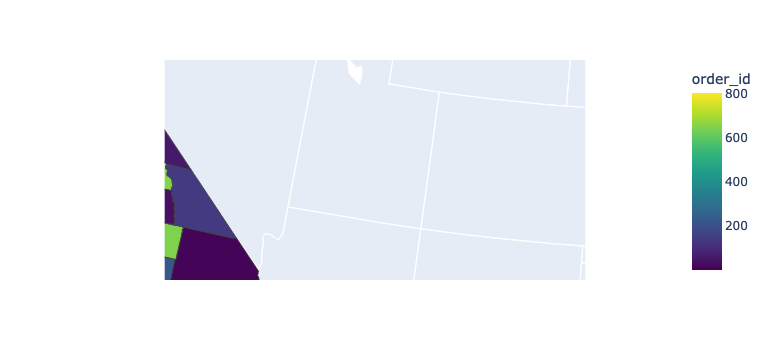

In [55]:
# FUNKTIONIERT NICHT UND ICH WEIß WIRKLICH NICHT WIESO UND HABE AUCH EINFACH KEINE LUST MEHR
from urllib.request import urlopen

with urlopen("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson") as response:
    california_geojson = json.load(response)

    
px.choropleth(df14,
             geojson=california_geojson,
             featureidkey="properties.name",
             locations = "county",
             color="order_id",  
             color_continuous_scale="Viridis",
             #mapbox_style="carto-positron",
             #zoom=2, 
             scope="usa",
             #opacity=0.5,
             labels={"order_dow":"Prime day"}
             ) 
# Max. durch Max jeweiliges Counties teilen --> 8 % der Bestellungen um 10 Uhr etc. 
        

In [57]:
df14.to_csv("prime_time.csv")

In [30]:
# Visualisieren, welche Counties für order_dow = 0 um welche Uhrzeit ihre Prime Time haben

#df_0=df14[df14["order_dow"]==0].groupby(["order_hour_of_day","county"],as_index=False).agg({"order_id":"sum","order_dow":"count"}).sort_values(by="order_id",ascending=False)
l.

In [ ]:
## Wäre gut, wenn man es gut visualisiert bekommt, welches County wann die Prime Time hat. Weiß aber nicht, wie genau das funktionieren sol

In [31]:
df_0.groupby("order_hour_of_day",as_index=False).agg({"county":"count","order_id":"sum"})

order_hour_of_day  county  order_id
0                 10       2       180
1                 12       4      1141
2                 13       7      1308
3                 14       5      1869
4                 15       9      1920

In [32]:
## Hier noch weitergehend: In Dashboard für Distribution!!!! 

## Most popular department

In [33]:
df

order_id  product_id  add_to_cart_order  reordered  user_id  \
0               1       17704                  3          1   205970   
1               1       17461                  7          1   205970   
2               1       46667                  6          1   205970   
3               1       17668                  5          1   205970   
4               1       33754                  1          1   205970   
...           ...         ...                ...        ...      ...   
6145743    604939       41950                  4          0    52726   
6145744    604939       38061                  9          0    52726   
6145745    604939       10667                  8          0    52726   
6145746    604939       18811                  3          1    52726   
6145747    604939       27845                  1          1    52726   

         order_dow  order_hour_of_day  days_since_prior_order  \
0                5                 17                    12.0   
1                5                 17                    12.0   
2                5                 17                    12.0   
3                5                 17                    12.0   
4                5                 17                    12.0   
...            ...                ...                     ...   
6145743          1                 11                     2.0   
6145744          1                 11                     2.0   
6145745          1                 11                     2.0   
6145746          1                 11                     2.0   
6145747          1                 11                     2.0   

                                              product_name  aisle_id  \
0                                                   Lemons       123   
1        Air Chilled Organic Boneless Skinless Chicken ...        35   
2                                      Organic Ginger Root        83   
3          Unsweetened Chocolate Almond Breeze Almond Milk        91   
4        Total 2% with Strawberry Lowfat Greek Strained...       120   
...                                                    ...       ...   
6145743                             Organic Tomato Cluster        83   
6145744                         Organic Raw Coconut Butter        36   
6145745                                    Imported Butter        36   
6145746                                Organic Apple Juice        98   
6145747                                 Organic Whole Milk        84   

         department_id    department                       aisle   county  
0                    4       produce  packaged vegetables fruits  Ventura  
1                   12  meat seafood             poultry counter  Ventura  
2                    4       produce            fresh vegetables  Ventura  
3                   16    dairy eggs             soy lactosefree  Ventura  
4                   16    dairy eggs                      yogurt  Ventura  
...                ...           ...                         ...      ...  
6145743              4       produce            fresh vegetables   Madera  
6145744             16    dairy eggs                      butter   Madera  
6145745             16    dairy eggs                      butter   Madera  
6145746              7     beverages               juice nectars   Madera  
6145747             16    dairy eggs                        milk   Madera  

[6145748 rows x 14 columns]

In [34]:
df15 = df.groupby("department",as_index=False)["order_id"].count().sort_values(by="order_id",ascending=False)
df16 = df15.head(10)

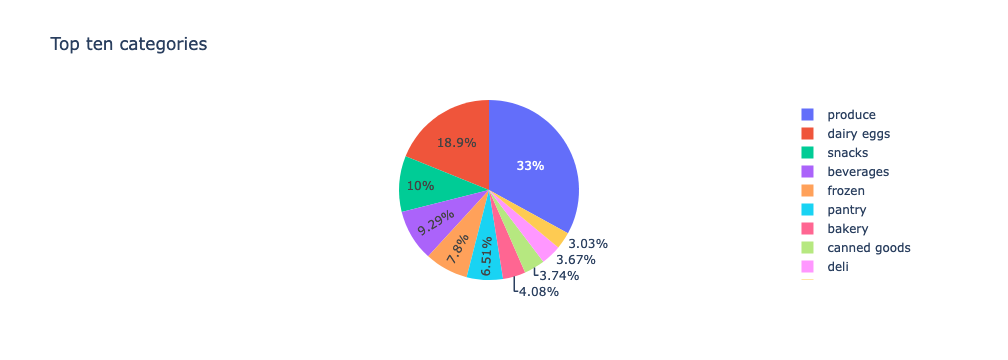

In [35]:
px.pie(df16,values="order_id",names="department",title="Top ten categories")

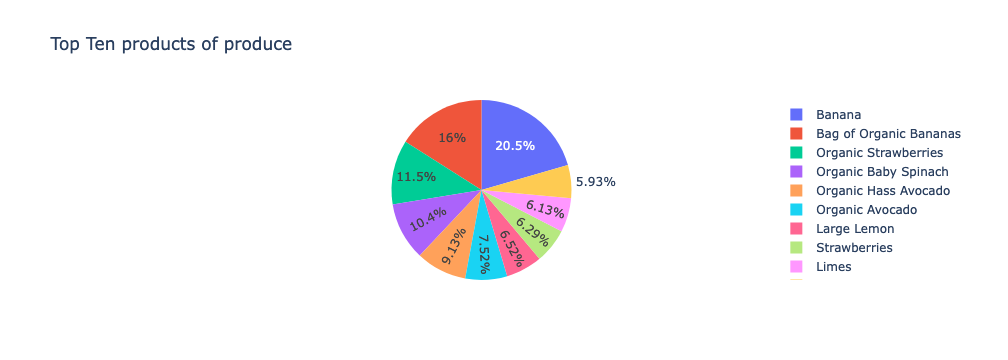

In [42]:
df17 = df[df["department"]=="produce"].groupby("product_name",as_index=False)["order_id"].count().sort_values(by="order_id",ascending=False)
df18 = df17.head(10)
px.pie(df18,values="order_id",names="product_name",title="Top Ten products of produce")

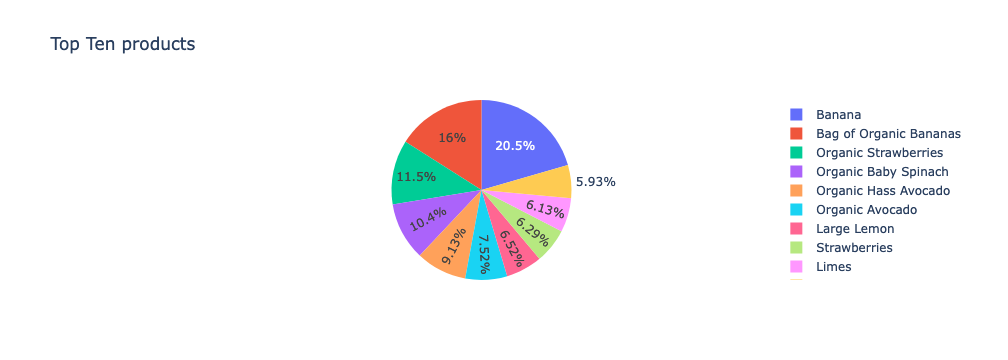

In [46]:
df19 = df.groupby("product_name",as_index=False)["order_id"].count().sort_values(by="order_id",ascending=False)
df20 = df19.head(10)
fig20 = px.pie(df20,values="order_id",names="product_name",title="Top Ten products")
fig20.show()

# Zeigt das selbe wie oben, top10 sind also komplett aus Bereich produce